In [29]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn import svm
from sklearn.metrics import accuracy_score
from scipy import stats
import warnings 
from sklearn.svm import SVC
warnings.filterwarnings('ignore')
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

## PART 1

In [4]:
# Load iris data
iris = load_iris()

# print data
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [8]:
# Select petal width and petal length features
iris_X = iris.data[:,2:]

In [9]:
# Scale the data
scaler = StandardScaler()
scaled_iris = scaler.fit_transform(iris_X)

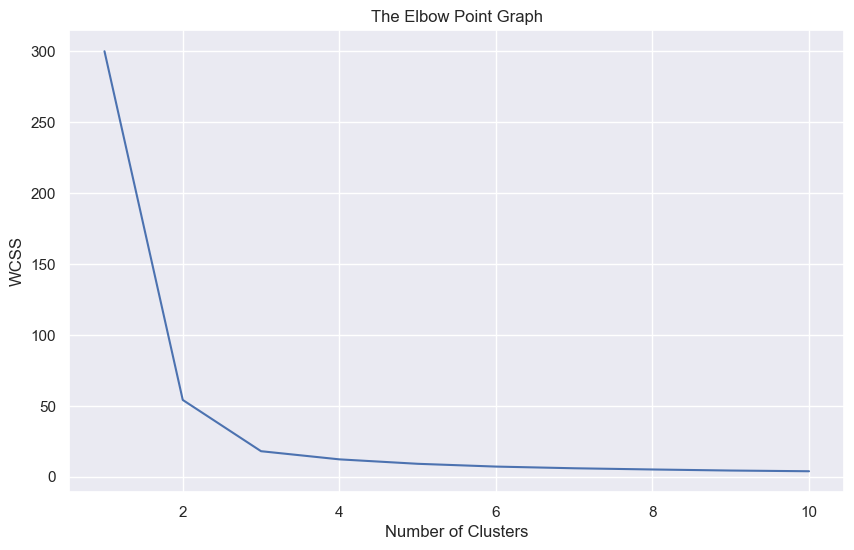

In [16]:
# finding wcss value for different number of clusters

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(scaled_iris)
    wcss.append(kmeans.inertia_)

# plot an elbow graph
plt.figure(figsize=(10, 6))
plt.plot(range(1,11), wcss)
plt.title('The Elbow Point Graph')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

### From 2, WCSS starts to level off. Therefore, optimal value for K is 2

## PART 2

In [17]:
# Load data
heart_data = pd.read_csv('heart.csv')
# Print the data
heart_data

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [18]:
# Check descriptive statistic of dataset
heart_data.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [19]:
# Check missing values
heart_data.isna().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [20]:
# Calculate z-scores for numerical columns
numerical_columns = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']
z_scores = stats.zscore(heart_data[numerical_columns])

# Find outliers based on threshold value of 3
outlier = heart_data[(abs(z_scores) > 3).any(axis=1)]

# remove outliers
new_heart_data = heart_data[~heart_data.index.isin(outlier.index)]

# Check data after outlier removal
new_heart_data

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [21]:
# Check descriptive statistic of dataset after outlier removal
new_heart_data.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,899.000000,899.000000,899.000000,899.000000,899.000000,899.000000,899.000000
mean,53.497219,132.027809,198.005562,0.232481,136.917686,0.861513,0.547275
std,9.456073,17.120895,107.157779,0.422649,25.356740,1.007626,0.498037
min,28.000000,80.000000,0.000000,0.000000,63.000000,-2.000000,0.000000
25%,47.000000,120.000000,174.500000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,222.000000,0.000000,138.000000,0.500000,1.000000
75%,60.000000,140.000000,266.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,185.000000,518.000000,1.000000,202.000000,4.000000,1.000000


In [22]:
# Convert text columns to numbers using one hot encoding
new_heart_data = pd.get_dummies(new_heart_data, drop_first=True)

# Check few rows of data after hot encoding
new_heart_data.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,0,True,True,False,False,True,False,False,False,True
1,49,160,180,0,156,1.0,1,False,False,True,False,True,False,False,True,False
2,37,130,283,0,98,0.0,0,True,True,False,False,False,True,False,False,True
3,48,138,214,0,108,1.5,1,False,False,False,False,True,False,True,True,False
4,54,150,195,0,122,0.0,0,True,False,True,False,True,False,False,False,True


In [23]:
# Check the value count for class
new_heart_data['HeartDisease'].value_counts()

HeartDisease
1    492
0    407
Name: count, dtype: int64

In [24]:
# Seperate data and labels
X = new_heart_data.drop(columns='HeartDisease', axis=1)
y = new_heart_data['HeartDisease']

In [26]:
scaler.fit(X)
# Transform the data
standardize_heart_data = scaler.transform(X)
# Print transformed data in similar range
print(standardize_heart_data)

[[-1.42815446  0.46590022  0.84963584 ... -0.8229452  -0.99888827
   1.13469459]
 [-0.47585532  1.63471366 -0.16812204 ... -0.8229452   1.00111297
  -0.88129441]
 [-1.7455875  -0.1185065   0.79361247 ... -0.8229452  -0.99888827
   1.13469459]
 ...
 [ 0.3706328  -0.1185065  -0.62564622 ...  1.21514774  1.00111297
  -0.88129441]
 [ 0.3706328  -0.1185065   0.35476274 ... -0.8229452   1.00111297
  -0.88129441]
 [-1.63977649  0.34901888 -0.21480818 ... -0.8229452  -0.99888827
   1.13469459]]


In [27]:
# Define label and target for model prediction
X = standardize_heart_data
y = new_heart_data['HeartDisease']

In [28]:
# split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify = y, random_state = 40)

In [35]:
# Check the shape of X
X.shape

(899, 11)

In [36]:
# Check the shape of X train
X_train.shape

(719, 11)

In [37]:
# Check the shape of X test
X_test.shape

(180, 11)

In [39]:
# Store all classifiers in dictionary to minimize number of code
dict_classifier = {"SVM": SVC(),
                   "Logistic Regression": LogisticRegression(),
                   "Random Forest": RandomForestClassifier()}

# Build the models
for classifier ,model in dict_classifier.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy=accuracy_score(y_test, y_pred)
    print(f"For {classifier} classifier accuracy score is {accuracy:.3f}")

For SVM classifier accuracy score is 0.867
For Logistic Regression classifier accuracy score is 0.850
For Random Forest classifier accuracy score is 0.872


In [58]:
# Use PCA to reduce dimention
pca = PCA(0.9)
X_PCA = pca.fit_transform(standardize_heart_data)

In [59]:
# split the data into train and test
PCA_X_train, PCA_X_test, PCA_y_train, PCA_y_test = train_test_split(X_PCA, y, test_size=0.2, stratify = y, random_state = 40)

In [65]:
# Build the model with PCA data
# Build the models
for classifier ,model in dict_classifier.items():
    model.fit(PCA_X_train, PCA_y_train)
    PCA_y_pred = model.predict(PCA_X_test)
    PCA_accuracy=accuracy_score(PCA_y_test, PCA_y_pred)
    print(f"For {classifier} classifier accuracy score is {PCA_accuracy:.3f}")

For SVM classifier accuracy score is 0.867
For Logistic Regression classifier accuracy score is 0.867
For Random Forest classifier accuracy score is 0.856


### BY reducing dimention with PCA, accuracy of Random forest model is decreased and accuracy of Logistic regression model is increased. Whereas, SVM model accuracy remain unchanged.